# Figure 9: Progressive, type-specific degeneration in the *rd10* retina

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ------------------------------------------------------------------------------------------------------------

# Load dataset with cells without quality filtering

In [2]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE-all-cells'

rd10_all_df = pd.read_pickle(file_path)  
# multiindex df to single index df
rd10_all_df = rd10_all_df.reset_index(level=[0,1,2,3,4,5,6,7,8,9,10,11])
# drop unnecessary keys
rd10_all_df = rd10_all_df.drop(columns=['training_data_hash','classifier_params_hash','preprocess_id','condition','raw_id','gchirp','bar'])
missing_genline_idx = np.where(rd10_all_df['genline']=='')[0]
rd10_all_df['genline'][missing_genline_idx]='rd10'
idx_p60 = np.where(rd10_all_df['animrem'].values=='P60')[0]
rd10_all_df = rd10_all_df.drop(idx_p60)
rd10_all_df = rd10_all_df.reset_index(drop=True)

/tmp/ipykernel_7347/3056493207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd10_all_df['genline'][missing_genline_idx]='rd10'


## compute total number of cells per condition

In [3]:
num_cells_wt_p30 = rd10_all_df[(rd10_all_df['genline']=='Bl6')&(rd10_all_df['animrem']=='P30')]['preproc_chirp'].values.shape[0]
num_cells_rd_p30 = rd10_all_df[(rd10_all_df['genline']=='rd10')&(rd10_all_df['animrem']=='P30')]['preproc_chirp'].values.shape[0]

num_cells_wt_p45 = rd10_all_df[(rd10_all_df['genline']=='Bl6')&(rd10_all_df['animrem']=='P45')]['preproc_chirp'].values.shape[0]
num_cells_rd_p45 = rd10_all_df[(rd10_all_df['genline']=='rd10')&(rd10_all_df['animrem']=='P45')]['preproc_chirp'].values.shape[0]

num_cells_wt_p90 = rd10_all_df[(rd10_all_df['genline']=='Bl6')&(rd10_all_df['animrem']=='P90')]['preproc_chirp'].values.shape[0]
num_cells_rd_p90 = rd10_all_df[(rd10_all_df['genline']=='rd10')&(rd10_all_df['animrem']=='P90')]['preproc_chirp'].values.shape[0]

# ------------------------------------------------------------------------------------------------------------

# load and clean filtered dataset

In [4]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE-filtered-cells'

rd10_df = pd.read_pickle(file_path)  
# multiindex df to single index df
rd10_df = rd10_df.reset_index(level=[0,1,2,3,4,5,6,7,8,9,10,11])
# drop unnecessary keys
rd10_df = rd10_df.drop(columns=['training_data_hash','classifier_params_hash','preprocess_id','condition','raw_id','gchirp','bar'])
missing_genline_idx = np.where(rd10_df['genline']=='')[0]
rd10_df['genline'][missing_genline_idx]='rd10'

idx_p60 = np.where(rd10_df['animrem'].values=='P60')[0]
rd10_df = rd10_df.drop(idx_p60)
rd10_df = rd10_df.reset_index(drop=True)

/tmp/ipykernel_7347/2957198727.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd10_df['genline'][missing_genline_idx]='rd10'


In [5]:
# exclude classified cells below threshold
confidence_score = 0.25
rd10_df = rd10_df[rd10_df['max_confidence']>=confidence_score]

# ------------------------------------------------------------------------------------------------------------

# Compute fractions

In [6]:
ncells_wt_p30 = rd10_df[(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]
ncells_wt_p45 = rd10_df[(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]
ncells_wt_p90 = rd10_df[(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]

ncells_rd_p30 = rd10_df[(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]
ncells_rd_p45 = rd10_df[(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]
ncells_rd_p90 = rd10_df[(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]

In [7]:
perc_clusters_wt_p30 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_wt_p45 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_wt_p90 = np.zeros(len(np.unique(rd10_df['celltype'])))

perc_clusters_rd_p30 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_rd_p45 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_rd_p90 = np.zeros(len(np.unique(rd10_df['celltype'])))

for i in range(len(perc_clusters_wt_p30)):
    perc_clusters_wt_p30[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / ncells_wt_p30 * 100,2)
    perc_clusters_wt_p45[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / ncells_wt_p45 * 100,2)
    perc_clusters_wt_p90[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / ncells_wt_p30 * 100,2)

    perc_clusters_rd_p30[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / ncells_rd_p30 * 100,2)
    perc_clusters_rd_p45[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / ncells_rd_p45 * 100,2)
    perc_clusters_rd_p90[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / ncells_rd_p90 * 100,2)

## differences of fractions

In [8]:
diff_frac_p30 = perc_clusters_wt_p30 - perc_clusters_rd_p30
diff_frac_p45 = perc_clusters_wt_p45 - perc_clusters_rd_p45
diff_frac_p90 = perc_clusters_wt_p90 - perc_clusters_rd_p90

# functional groups

In [9]:
off_p30 = sum(diff_frac_p30[0:9])
on_off_p30 = sum(diff_frac_p30[9:14])
fast_on_p30 = sum(diff_frac_p30[14:20])
slow_on_p30 = sum(diff_frac_p30[20:28])
unc_p30 = sum(diff_frac_p30[28:32])
dac_p30 = sum(diff_frac_p30[32:])
diff_p30 = np.asarray([off_p30,on_off_p30,fast_on_p30,slow_on_p30,unc_p30,dac_p30])

In [10]:
off_p45 = sum(diff_frac_p45[0:9])
on_off_p45 = sum(diff_frac_p45[9:14])
fast_on_p45 = sum(diff_frac_p45[14:20])
slow_on_p45 = sum(diff_frac_p45[20:28])
unc_p45 = sum(diff_frac_p45[28:32])
dac_p45 = sum(diff_frac_p45[32:])
diff_p45 = np.asarray([off_p45,on_off_p45,fast_on_p45,slow_on_p45,unc_p45,dac_p45])

In [11]:
off_p90 = sum(diff_frac_p90[0:9])
on_off_p90 = sum(diff_frac_p90[9:14])
fast_on_p90 = sum(diff_frac_p90[14:20])
slow_on_p90 = sum(diff_frac_p90[20:28])
unc_p90 = sum(diff_frac_p90[28:32])
dac_p90 = sum(diff_frac_p90[32:])
diff_p90 = np.asarray([off_p90,on_off_p90,fast_on_p90,slow_on_p90,unc_p90,dac_p90])

# ------------------------------------------------------------------------------------------------------------

# Comparison of cell-per-group percentages as log<sub>2</sub> ratio between *wild-type* and *rd10* per age

In [12]:
ncells_wt_p30 = rd10_df[(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]
ncells_wt_p45 = rd10_df[(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]
ncells_wt_p90 = rd10_df[(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]

ncells_rd_p30 = rd10_df[(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]
ncells_rd_p45 = rd10_df[(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]
ncells_rd_p90 = rd10_df[(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]

In [13]:
perc_clusters_wt_p30 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_wt_p45 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_wt_p90 = np.zeros(len(np.unique(rd10_df['celltype'])))

perc_clusters_rd_p30 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_rd_p45 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_rd_p90 = np.zeros(len(np.unique(rd10_df['celltype'])))

for i in range(len(perc_clusters_wt_p30)):
    perc_clusters_wt_p30[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / ncells_wt_p30 * 100,2)
    perc_clusters_wt_p45[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / ncells_wt_p45 * 100,2)
    perc_clusters_wt_p90[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / ncells_wt_p30 * 100,2)

    perc_clusters_rd_p30[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / ncells_rd_p30 * 100,2)
    perc_clusters_rd_p45[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / ncells_rd_p45 * 100,2)
    perc_clusters_rd_p90[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / ncells_rd_p90 * 100,2)

In [14]:
log_perc_p30 = np.log2((perc_clusters_rd_p30/perc_clusters_wt_p30))
log_perc_p45 = np.log2((perc_clusters_rd_p45/perc_clusters_wt_p45))
log_perc_p90 = np.log2((perc_clusters_rd_p90/perc_clusters_wt_p90))

log_perc_p90[np.isneginf(log_perc_p90)] = 0
log_perc_p30[np.isinf(log_perc_p30)] = 0

/tmp/ipykernel_7347/2743656913.py:1: RuntimeWarning: divide by zero encountered in divide
  log_perc_p30 = np.log2((perc_clusters_rd_p30/perc_clusters_wt_p30))
/tmp/ipykernel_7347/2743656913.py:3: RuntimeWarning: divide by zero encountered in log2
  log_perc_p90 = np.log2((perc_clusters_rd_p90/perc_clusters_wt_p90))


In [16]:
colors = ['tab:red'] * 9 + ['gold'] * 5 + ['tab:green'] * 6 + ['tab:blue'] * 8 + ['purple'] * 4
df_p30 = pd.DataFrame({'wt':perc_clusters_wt_p30[:32], 'rd10':perc_clusters_rd_p30[:32]},index=np.arange(1,33,1))
df_p45 = pd.DataFrame({'wt':perc_clusters_wt_p45[:32], 'rd10':perc_clusters_rd_p45[:32]},index=np.arange(1,33,1))
df_p90 = pd.DataFrame({'wt':perc_clusters_wt_p90[:32], 'rd10':perc_clusters_rd_p90[:32]},index=np.arange(1,33,1))

df_log_roc_p30 = pd.DataFrame({'RoC':log_perc_p30[:32]},index=np.arange(1,33,1))
df_log_roc_p45 = pd.DataFrame({'RoC':log_perc_p45[:32]},index=np.arange(1,33,1))
df_log_roc_p90 = pd.DataFrame({'RoC':log_perc_p90[:32]},index=np.arange(1,33,1))

df_log_roc_p30 = pd.DataFrame({'RoC':log_perc_p30[:32],'color':colors},index=np.arange(1,33,1))
df_log_roc_p45 = pd.DataFrame({'RoC':log_perc_p45[:32],'color':colors},index=np.arange(1,33,1))
df_log_roc_p90 = pd.DataFrame({'RoC':log_perc_p90[:32],'color':colors},index=np.arange(1,33,1))

In [17]:
df_roc_all = pd.DataFrame({'RoC_P30':log_perc_p30[:32],
                           'RoC_P45':log_perc_p45[:32],
                           'RoC_P90':log_perc_p90[:32],
                           'celltype':np.arange(1,33,1),
                           'color':colors},index=np.arange(1,33,1))

In [18]:
roc_all = np.zeros((32,3))
for i in range(32):
    roc_all[i,:] = df_roc_all[df_roc_all['celltype']==i+1].values[0][:3]
    
roc_all[np.isinf(roc_all)] = 0

# ------------------------------------------------------------------------------------------------------------

# Statistics: binomial test

In [19]:
n_rd10_cells_p30 = np.zeros(32)
n_rd10_cells_p45 = np.zeros(32)
n_rd10_cells_p90 = np.zeros(32)

n_wt_cells_p30 = np.zeros(32)
n_wt_cells_p45 = np.zeros(32)
n_wt_cells_p90 = np.zeros(32)

for i in range(32):
    n_rd10_cells_p30[i] = np.array((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]))
    n_rd10_cells_p45[i] = (rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0])
    n_rd10_cells_p90[i] = (rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0])

    n_wt_cells_p30[i] = (rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0])
    n_wt_cells_p45[i] = (rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0])
    n_wt_cells_p90[i] = (rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0])

In [20]:
# Calculate expected proportions in wild-type
p_wildtype_p30 = np.array(n_wt_cells_p30) / ncells_wt_p30
p_wildtype_p45 = np.array(n_wt_cells_p45) / ncells_wt_p45
p_wildtype_p90 = np.array(n_wt_cells_p90) / ncells_wt_p90

In [21]:
# P30
p_values_p30 = []
for k_rd10, p_exp in zip(n_rd10_cells_p30.astype(int), p_wildtype_p30):
    # Perform two-tailed binomial test
    result = stats.binomtest(k_rd10, n=ncells_rd_p30, p=p_exp, alternative='two-sided')
    p_values_p30.append(result.pvalue)
    
adjusted_p_values_p30 = multipletests(p_values_p30, alpha=0.01, method='fdr_bh')[1]  

# P45
p_values_p45 = []
for k_rd10, p_exp in zip(n_rd10_cells_p45.astype(int), p_wildtype_p45):
    # Perform two-tailed binomial test
    result = stats.binomtest(k_rd10, n=ncells_rd_p45, p=p_exp, alternative='two-sided')
    p_values_p45.append(result.pvalue)
    
adjusted_p_values_p45 = multipletests(p_values_p45, alpha=0.01, method='fdr_bh')[1]  


# P30
p_values_p90 = []
for k_rd10, p_exp in zip(n_rd10_cells_p90.astype(int), p_wildtype_p90):
    # Perform two-tailed binomial test
    result = stats.binomtest(k_rd10, n=ncells_rd_p90, p=p_exp, alternative='two-sided')
    p_values_p90.append(result.pvalue)
    
adjusted_p_values_p90 = multipletests(p_values_p90, alpha=0.01, method='fdr_bh')[1]  

In [22]:
rgc_types = [f"RGC type {i}" for i in range(1, 33)]

In [23]:
print("Cluster | Observed rd10 | Expected Proportion (wild-type) | P-value | Adjusted P-value | Significant")
for rgc_type, obs, exp, p_val, adj_p_val in zip(rgc_types, n_rd10_cells_p30, p_wildtype_p30, p_values_p30, adjusted_p_values_p30):
    is_significant = "Yes" if adj_p_val < 0.01 else "No"
    print(f"{rgc_type:8} | {obs:13} | {exp:30.4f} | {p_val:.4f} | {adj_p_val:.4f} | {is_significant}")

Cluster | Observed rd10 | Expected Proportion (wild-type) | P-value | Adjusted P-value | Significant
RGC type 1 |          22.0 |                         0.0310 | 0.0000 | 0.0000 | Yes
RGC type 2 |           5.0 |                         0.0105 | 0.0000 | 0.0001 | Yes
RGC type 3 |           8.0 |                         0.0163 | 0.0000 | 0.0000 | Yes
RGC type 4 |          18.0 |                         0.0205 | 0.0000 | 0.0001 | Yes
RGC type 5 |           3.0 |                         0.0100 | 0.0000 | 0.0000 | Yes
RGC type 6 |           2.0 |                         0.0016 | 0.7797 | 0.8603 | No
RGC type 7 |           7.0 |                         0.0095 | 0.0015 | 0.0037 | Yes
RGC type 8 |           3.0 |                         0.0026 | 0.3923 | 0.4650 | No
RGC type 9 |           5.0 |                         0.0063 | 0.0183 | 0.0308 | No
RGC type 10 |           9.0 |                         0.0089 | 0.0199 | 0.0318 | No
RGC type 11 |          19.0 |                         0.0137 |

In [24]:
print("Cluster | Observed rd10 | Expected Proportion (wild-type) | P-value | Adjusted P-value | Significant")
for rgc_type, obs, exp, p_val, adj_p_val in zip(rgc_types, n_rd10_cells_p45, p_wildtype_p45, p_values_p45, adjusted_p_values_p45):
    is_significant = "Yes" if adj_p_val < 0.01 else "No"
    print(f"{rgc_type:8} | {obs:13} | {exp:30.4f} | {p_val:.4f} | {adj_p_val:.4f} | {is_significant}")

Cluster | Observed rd10 | Expected Proportion (wild-type) | P-value | Adjusted P-value | Significant
RGC type 1 |           4.0 |                         0.0197 | 0.0000 | 0.0000 | Yes
RGC type 2 |           6.0 |                         0.0071 | 0.0059 | 0.0112 | No
RGC type 3 |           7.0 |                         0.0096 | 0.0004 | 0.0008 | Yes
RGC type 4 |          13.0 |                         0.0151 | 0.0000 | 0.0001 | Yes
RGC type 5 |           5.0 |                         0.0050 | 0.0538 | 0.0817 | No
RGC type 6 |           1.0 |                         0.0030 | 0.0129 | 0.0229 | No
RGC type 7 |           6.0 |                         0.0066 | 0.0136 | 0.0229 | No
RGC type 8 |           2.0 |                         0.0030 | 0.0562 | 0.0817 | No
RGC type 9 |           3.0 |                         0.0076 | 0.0001 | 0.0001 | Yes
RGC type 10 |          16.0 |                         0.0182 | 0.0000 | 0.0000 | Yes
RGC type 11 |           8.0 |                         0.0197 | 

In [25]:
print("Cluster | Observed rd10 | Expected Proportion (wild-type) | P-value | Adjusted P-value | Significant")
for rgc_type, obs, exp, p_val, adj_p_val in zip(rgc_types, n_rd10_cells_p90, p_wildtype_p90, p_values_p90, adjusted_p_values_p90):
    is_significant = "Yes" if adj_p_val < 0.01 else "No"
    print(f"{rgc_type:8} | {obs:13} | {exp:30.4f} | {p_val:.4f} | {adj_p_val:.4f} | {is_significant}")

Cluster | Observed rd10 | Expected Proportion (wild-type) | P-value | Adjusted P-value | Significant
RGC type 1 |           5.0 |                         0.0304 | 0.0000 | 0.0000 | Yes
RGC type 2 |           2.0 |                         0.0110 | 0.0004 | 0.0010 | Yes
RGC type 3 |           2.0 |                         0.0121 | 0.0001 | 0.0003 | Yes
RGC type 4 |           2.0 |                         0.0199 | 0.0000 | 0.0000 | Yes
RGC type 5 |           1.0 |                         0.0047 | 0.0531 | 0.0708 | No
RGC type 6 |           0.0 |                         0.0026 | 0.0842 | 0.1037 | No
RGC type 7 |           0.0 |                         0.0037 | 0.0271 | 0.0394 | No
RGC type 8 |           2.0 |                         0.0026 | 0.7766 | 0.7766 | No
RGC type 9 |           0.0 |                         0.0026 | 0.0842 | 0.1037 | No
RGC type 10 |           5.0 |                         0.0184 | 0.0000 | 0.0001 | Yes
RGC type 11 |           4.0 |                         0.0252 | 

# ------------------------------------------------------------------------------------------------------------

# Figures

In [26]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE-ALL_CELLS'
rd10_all_df = pd.read_pickle(file_path)  
# multiindex df to single index df
rd10_all_df = rd10_all_df.reset_index(level=[0,1,2,3,4,5,6,7,8,9,10,11])
# drop unnecessary keys
rd10_all_df = rd10_all_df.drop(columns=['training_data_hash','classifier_params_hash','preprocess_id','condition','raw_id','gchirp','bar'])
missing_genline_idx = np.where(rd10_all_df['genline']=='')[0]
rd10_all_df['genline'][missing_genline_idx]='rd10'
idx_p60 = np.where(rd10_all_df['animrem'].values=='P60')[0]
rd10_all_df = rd10_all_df.drop(idx_p60)
rd10_all_df = rd10_all_df.reset_index(drop=True)

/tmp/ipykernel_7347/3658885332.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd10_all_df['genline'][missing_genline_idx]='rd10'


In [27]:
num_cells_wt_p30 = rd10_all_df[(rd10_all_df['genline']=='Bl6')&(rd10_all_df['animrem']=='P30')]['preproc_chirp'].values.shape[0]
num_cells_rd_p30 = rd10_all_df[(rd10_all_df['genline']=='rd10')&(rd10_all_df['animrem']=='P30')]['preproc_chirp'].values.shape[0]

num_cells_wt_p45 = rd10_all_df[(rd10_all_df['genline']=='Bl6')&(rd10_all_df['animrem']=='P45')]['preproc_chirp'].values.shape[0]
num_cells_rd_p45 = rd10_all_df[(rd10_all_df['genline']=='rd10')&(rd10_all_df['animrem']=='P45')]['preproc_chirp'].values.shape[0]

num_cells_wt_p90 = rd10_all_df[(rd10_all_df['genline']=='Bl6')&(rd10_all_df['animrem']=='P90')]['preproc_chirp'].values.shape[0]
num_cells_rd_p90 = rd10_all_df[(rd10_all_df['genline']=='rd10')&(rd10_all_df['animrem']=='P90')]['preproc_chirp'].values.shape[0]

In [28]:
perc_clusters_wt_p30 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_wt_p45 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_wt_p90 = np.zeros(len(np.unique(rd10_df['celltype'])))

perc_clusters_rd_p30 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_rd_p45 = np.zeros(len(np.unique(rd10_df['celltype'])))
perc_clusters_rd_p90 = np.zeros(len(np.unique(rd10_df['celltype'])))

for i in range(len(perc_clusters_wt_p30)):
    perc_clusters_wt_p30[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p30 * 100,2)
    perc_clusters_wt_p45[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p45 * 100,2)
    perc_clusters_wt_p90[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p90 * 100,2)

    perc_clusters_rd_p30[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p30 * 100,2)
    perc_clusters_rd_p45[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p45 * 100,2)
    perc_clusters_rd_p90[i] = round((rd10_df[(rd10_df['celltype']==i+1)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p90 * 100,2)

In [29]:
df_p30 = pd.DataFrame({'wt':perc_clusters_wt_p30[:32], 'rd10':perc_clusters_rd_p30[:32]},index=np.arange(1,33,1))
df_p45 = pd.DataFrame({'wt':perc_clusters_wt_p45[:32], 'rd10':perc_clusters_rd_p45[:32]},index=np.arange(1,33,1))
df_p90 = pd.DataFrame({'wt':perc_clusters_wt_p90[:32], 'rd10':perc_clusters_rd_p90[:32]},index=np.arange(1,33,1))

log_perc_p30 = np.log2((perc_clusters_rd_p30/perc_clusters_wt_p30))
log_perc_p45 = np.log2((perc_clusters_rd_p45/perc_clusters_wt_p45))
log_perc_p90 = np.log2((perc_clusters_rd_p90/perc_clusters_wt_p90))

log_perc_p90[np.isneginf(log_perc_p90)] = 0
log_perc_p30[np.isinf(log_perc_p30)] = 0

df_log_roc_p30 = pd.DataFrame({'RoC':log_perc_p30[:32]},index=np.arange(1,33,1))
df_log_roc_p45 = pd.DataFrame({'RoC':log_perc_p45[:32]},index=np.arange(1,33,1))
df_log_roc_p90 = pd.DataFrame({'RoC':log_perc_p90[:32]},index=np.arange(1,33,1))

/tmp/ipykernel_7347/945566527.py:5: RuntimeWarning: divide by zero encountered in divide
  log_perc_p30 = np.log2((perc_clusters_rd_p30/perc_clusters_wt_p30))
/tmp/ipykernel_7347/945566527.py:7: RuntimeWarning: divide by zero encountered in log2
  log_perc_p90 = np.log2((perc_clusters_rd_p90/perc_clusters_wt_p90))


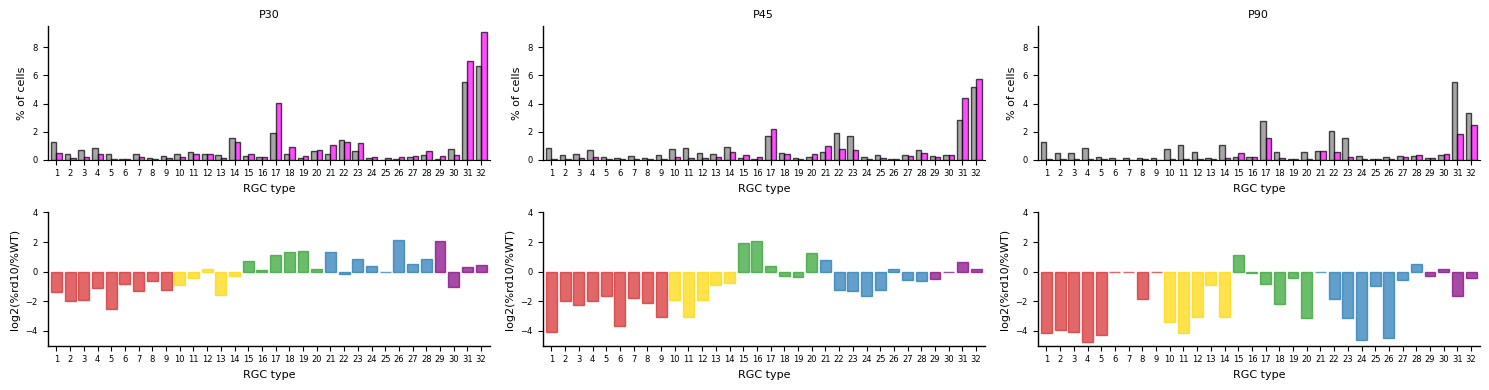

In [30]:
fig,ax=plt.subplots(2,3,figsize=(15,4))

df_p30.plot(kind="bar",alpha=0.7,edgecolor='black',color=['gray','magenta'],rot=0,width=0.8,ax=ax[0,0],legend=False)
ax[0,0].set_ylabel('% of cells',fontsize=8)
ax[0,0].set_xlabel('RGC type',fontsize=8)
ax[0,0].tick_params(axis='both', which='major', labelsize=6)
#ax[0,0].spines['left'].set_position(('outward', 10))
for axis in ['left']:
    ax[0,0].spines[axis].set_linewidth(1.)
ax[0,0].spines['bottom'].set_visible(False)  

axes = df_log_roc_p30.plot(kind="bar",alpha=0.7,edgecolor='black',rot=0,width=0.8,ax=ax[1,0],legend=False)
ax[1,0].set_ylabel('log2(%rd10/%WT)',fontsize=8)
ax[1,0].set_xlabel('RGC type',fontsize=8)
ax[1,0].tick_params(axis='both', which='major', labelsize=6)
#ax[1,0].spines['left'].set_position(('outward', 10))
#ax[1,0].spines['bottom'].set_position(('outward', 10))
for axis in ['bottom','left']:
    ax[1,0].spines[axis].set_linewidth(1.)
ax[1,0].set_ylim(-5,4)    


for i, bar in enumerate(axes.patches):  # ax.patches contains all the bars
    if 1 <= i+1 <= 9:
        bar.set_color('tab:red')  # 1-9 in blue
    elif 10 <= i+1 <= 14:
        bar.set_color('gold')  # 10-14 in green
    elif 15 <= i+1 <= 20:
        bar.set_color('tab:green')  # 10-14 in green
    elif 21 <= i+1 <= 28:
        bar.set_color('tab:blue')  # 10-14 in green
    elif 29 <= i+1 <= 32:
        bar.set_color('purple')  # 10-14 in green    

        
# P45
df_p45.plot(kind="bar",alpha=0.7,edgecolor='black',color=['gray','magenta'],rot=0,width=0.8,ax=ax[0,1],legend=False)
ax[0,1].set_ylabel('% of cells',fontsize=8)
ax[0,1].set_xlabel('RGC type',fontsize=8)
ax[0,1].tick_params(axis='both', which='major', labelsize=6)
#ax[0,1].spines['left'].set_position(('outward', 10))
for axis in ['left']:
    ax[0,1].spines[axis].set_linewidth(1.)
ax[0,1].spines['bottom'].set_visible(False)  

axes2 = df_log_roc_p45.plot(kind="bar",alpha=0.7,edgecolor='black',rot=0,width=0.8,ax=ax[1,1],legend=False)
ax[1,1].set_ylabel('log2(%rd10/%WT)',fontsize=8)
ax[1,1].set_xlabel('RGC type',fontsize=8)
ax[1,1].tick_params(axis='both', which='major', labelsize=6)
#ax[1,1].spines['left'].set_position(('outward', 10))
#ax[1,1].spines['bottom'].set_position(('outward', 10))
for axis in ['bottom','left']:
    ax[1,1].spines[axis].set_linewidth(1.)
ax[1,1].set_ylim(-5,4)    
        
        
for i, bar in enumerate(axes2.patches):  # ax.patches contains all the bars
    if 1 <= i+1 <= 9:
        bar.set_color('tab:red')  # 1-9 in blue
    elif 10 <= i+1 <= 14:
        bar.set_color('gold')  # 10-14 in green
    elif 15 <= i+1 <= 20:
        bar.set_color('tab:green')  # 10-14 in green
    elif 21 <= i+1 <= 28:
        bar.set_color('tab:blue')  # 10-14 in green
    elif 29 <= i+1 <= 32:
        bar.set_color('purple')  # 10-14 in green            
        
        
# P90
df_p90.plot(kind="bar",alpha=0.7,edgecolor='black',color=['gray','magenta'],rot=0,width=0.8,ax=ax[0,2],legend=False)
ax[0,2].set_ylabel('% of cells',fontsize=8)
ax[0,2].set_xlabel('RGC type',fontsize=8)
ax[0,2].tick_params(axis='both', which='major', labelsize=6)
#ax[0,2].spines['left'].set_position(('outward', 10))
for axis in ['left']:
    ax[0,2].spines[axis].set_linewidth(1.)
ax[0,2].spines['bottom'].set_visible(False)  

axes3 = df_log_roc_p90.plot(kind="bar",alpha=0.7,edgecolor='black',rot=0,width=0.8,ax=ax[1,2],legend=False)
ax[1,2].set_ylabel('log2(%rd10/%WT)',fontsize=8)
ax[1,2].set_xlabel('RGC type',fontsize=8)
ax[1,2].tick_params(axis='both', which='major', labelsize=6)
#ax[1,2].spines['left'].set_position(('outward', 10))
#ax[1,2].spines['bottom'].set_position(('outward', 10))
for axis in ['bottom','left']:
    ax[1,2].spines[axis].set_linewidth(1.)
ax[1,2].set_ylim(-5,4)    

ax[0,0].set_ylim(0,9.5)    
ax[0,1].set_ylim(0,9.5)    
ax[0,2].set_ylim(0,9.5)    

        
for i, bar in enumerate(axes3.patches):  # ax.patches contains all the bars
    if 1 <= i+1 <= 9:
        bar.set_color('tab:red')  # 1-9 in blue
    elif 10 <= i+1 <= 14:
        bar.set_color('gold')  # 10-14 in green
    elif 15 <= i+1 <= 20:
        bar.set_color('tab:green')  # 10-14 in green
    elif 21 <= i+1 <= 28:
        bar.set_color('tab:blue')  # 10-14 in green
    elif 29 <= i+1 <= 32:
        bar.set_color('purple')  # 10-14 in green           
        
ax[0,0].set_title('P30',fontsize=8)        
ax[0,1].set_title('P45',fontsize=8)        
ax[0,2].set_title('P90',fontsize=8)        
 
sns.despine()
fig.tight_layout()

In [31]:
df_roc_all = pd.DataFrame({'RoC_P30':log_perc_p30[:32],
                           'RoC_P45':log_perc_p45[:32],
                           'RoC_P90':log_perc_p90[:32],
                           'celltype':np.arange(1,33,1),
                           'color':colors},index=np.arange(1,33,1))

In [32]:
roc_all = np.zeros((32,3))
for i in range(32):
    roc_all[i,:] = df_roc_all[df_roc_all['celltype']==i+1].values[0][:3]
    
roc_all[np.isinf(roc_all)] = 0

In [33]:
std_off = np.zeros(3)
std_off[0] = np.std(roc_all[0:9,0],axis=0)
std_off[1] = np.std(roc_all[0:9,1],axis=0)
std_off[2] = np.std(roc_all[0:9,2][roc_all[0:9,2]!=0],axis=0)

std_slow_on = np.zeros(3)
std_slow_on[0] = np.std(roc_all[20:28,0][roc_all[20:28,2]!=0],axis=0)
std_slow_on[1] = np.std(roc_all[20:28,1],axis=0)
std_slow_on[2] = np.std(roc_all[20:28,2],axis=0)


mean_off = np.zeros(3)
mean_off[0] = np.mean(roc_all[0:9,0],axis=0)
mean_off[1] = np.mean(roc_all[0:9,1],axis=0)
mean_off[2] = np.mean(roc_all[0:9,2][roc_all[0:9,2]!=0],axis=0)

mean_slow_on = np.zeros(3)
mean_slow_on[0] = np.mean(roc_all[20:28,0][roc_all[20:28,2]!=0],axis=0)
mean_slow_on[1] = np.mean(roc_all[20:28,1],axis=0)
mean_slow_on[2] = np.mean(roc_all[20:28,2],axis=0)

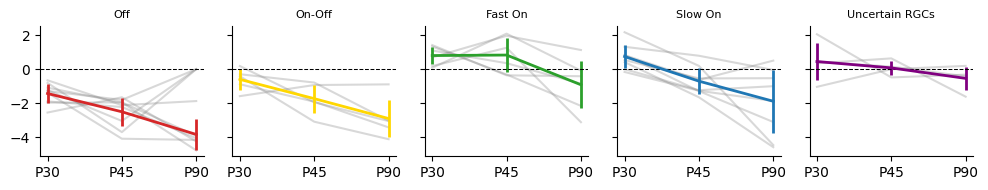

In [34]:
fig,ax=plt.subplots(1,5,figsize=(10,2),sharey=True)

for i in np.arange(0,9,1):
#for i in np.where(roc_all[0:9,2]!=0)[0]:  
    ax[0].plot(roc_all[i,:],color='gray',alpha=0.3)

for i in np.arange(9,14,1):
    ax[1].plot(roc_all[i,:],color='gray',alpha=0.3)    

for i in np.arange(14,20,1):
    ax[2].plot(roc_all[i,:],color='gray',alpha=0.3) 

for i in np.arange(20,28,1):
    ax[3].plot(roc_all[i,:],color='gray',alpha=0.3) 
    
for i in np.arange(28,32,1):
    ax[4].plot(roc_all[i,:],color='gray',alpha=0.3) 
    
ax[0].errorbar(np.arange(0,3,1),mean_off,yerr=std_off,color='tab:red',lw=2)
ax[1].errorbar(np.arange(0,3,1),np.mean(roc_all[9:14,:],axis=0),yerr=np.std(roc_all[9:14,:],axis=0),color='gold',lw=2)
ax[2].errorbar(np.arange(0,3,1),np.mean(roc_all[14:20,:],axis=0),yerr=np.std(roc_all[14:20,:],axis=0),color='tab:green',lw=2)
#ax[3].errorbar(np.arange(0,3,1),np.mean(roc_all[20:28,:],axis=0),yerr=np.std(roc_all[20:28,:],axis=0),color='tab:blue',lw=2)
ax[3].errorbar(np.arange(0,3,1),mean_slow_on,yerr=std_slow_on,color='tab:blue',lw=2)
ax[4].errorbar(np.arange(0,3,1),np.mean(roc_all[28:,:],axis=0),yerr=np.std(roc_all[28:,:],axis=0),color='purple',lw=2)


ax[0].set_title('Off',fontsize=8)
ax[1].set_title('On-Off',fontsize=8)
ax[2].set_title('Fast On',fontsize=8)
ax[3].set_title('Slow On',fontsize=8)
ax[4].set_title('Uncertain RGCs',fontsize=8)


xticks = [0,1,2]  # Set your x-ticks positions here
xtick_labels = ['P30', 'P45', 'P90']  # Set your custom labels here

for i in range(5):
    ax[i].set_xticks(ticks=xticks, labels=xtick_labels,fontsize=8)
    ax[i].tick_params(axis='both', which='major', labelsize=10)  # Adjust 'labelsize' as needed
    ax[i].axhline(0,ls='--',lw=0.75,color='k')

sns.despine()
fig.tight_layout()

## Statistics

### OFF

In [35]:
off_p30 = roc_all[0:9,0]
off_p45 = roc_all[0:9,1]
off_p90 = roc_all[0:9,2]

In [36]:
f_value, p_value = stats.f_oneway(off_p30, off_p45, off_p90)
print(f'ANOVA F-value: {f_value}, p-value: {p_value}')

ANOVA F-value: 2.0006515724547644, p-value: 0.1571795281365119


In [37]:
if p_value < 0.05:
    print("Significant differences found, proceeding with Tukey's HSD test.")

    # Combine the groups into a single data array and corresponding labels
    data = np.concatenate([off_p30, off_p45, off_p90])
    labels = ['Group 1'] * len(off_p30) + ['Group 2'] * len(off_p45) + ['Group 3'] * len(off_p90)

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences found among the groups.")

No significant differences found among the groups.


### ON-OFF

In [38]:
on_off_p30 = roc_all[9:14,0]
on_off_p45 = roc_all[9:14,1]
on_off_p90 = roc_all[9:14,2]

In [39]:
f_value, p_value = stats.f_oneway(on_off_p30, on_off_p45, on_off_p90)
print(f'ANOVA F-value: {f_value}, p-value: {p_value}')

ANOVA F-value: 7.187702536812987, p-value: 0.008869367430730055


In [40]:
if p_value < 0.05:
    print("Significant differences found, proceeding with Tukey's HSD test.")

    # Combine the groups into a single data array and corresponding labels
    data = np.concatenate([on_off_p30, on_off_p45, on_off_p90])
    labels = ['Group 1'] * len(on_off_p30) + ['Group 2'] * len(on_off_p45) + ['Group 3'] * len(on_off_p90)

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences found among the groups.")

Significant differences found, proceeding with Tukey's HSD test.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Group 1 Group 2  -1.1322  0.191 -2.7516  0.4872  False
Group 1 Group 3  -2.3014 0.0067 -3.9208 -0.6819   True
Group 2 Group 3  -1.1692 0.1738 -2.7886  0.4502  False
------------------------------------------------------


### FAST ON

In [41]:
fast_on_p30 = roc_all[14:20,0]
fast_on_p45 = roc_all[14:20,1]
fast_on_p90 = roc_all[14:20,2]

In [42]:
f_value, p_value = stats.f_oneway(fast_on_p30, fast_on_p45, fast_on_p90)
print(f'ANOVA F-value: {f_value}, p-value: {p_value}')

ANOVA F-value: 4.699681689556895, p-value: 0.026022303057256297


In [43]:
if p_value < 0.05:
    print("Significant differences found, proceeding with Tukey's HSD test.")

    # Combine the groups into a single data array and corresponding labels
    data = np.concatenate([fast_on_p30, fast_on_p45, fast_on_p90])
    labels = ['Group 1'] * len(fast_on_p30) + ['Group 2'] * len(fast_on_p45) + ['Group 3'] * len(fast_on_p90)

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences found among the groups.")

Significant differences found, proceeding with Tukey's HSD test.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Group 1 Group 2   0.0297 0.9989 -1.6644  1.7238  False
Group 1 Group 3  -1.7166 0.0468 -3.4107 -0.0225   True
Group 2 Group 3  -1.7463 0.0429 -3.4404 -0.0523   True
------------------------------------------------------


### SLOW ON

In [44]:
slow_on_p30 = roc_all[20:28,0]
slow_on_p45 = roc_all[20:28,1]
slow_on_p90 = roc_all[20:28,2]

In [45]:
f_value, p_value = stats.f_oneway(slow_on_p30, slow_on_p45, slow_on_p90)
print(f'ANOVA F-value: {f_value}, p-value: {p_value}')

ANOVA F-value: 8.105007143246247, p-value: 0.0024624890538576145


In [46]:
if p_value < 0.05:
    print("Significant differences found, proceeding with Tukey's HSD test.")

    # Combine the groups into a single data array and corresponding labels
    data = np.concatenate([slow_on_p30, slow_on_p45, slow_on_p90])
    labels = ['Group 1'] * len(slow_on_p30) + ['Group 2'] * len(slow_on_p45) + ['Group 3'] * len(slow_on_p90)

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences found among the groups.")

Significant differences found, proceeding with Tukey's HSD test.
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
Group 1 Group 2  -1.4461 0.0924 -3.0943  0.2021  False
Group 1 Group 3  -2.6283 0.0017 -4.2765 -0.9801   True
Group 2 Group 3  -1.1822 0.1914 -2.8304   0.466  False
------------------------------------------------------


### UNC. RGCs

In [47]:
urgc_p30 = roc_all[28:,0]
urgc_p45 = roc_all[28:,1]
urgc_p90 = roc_all[28:,2]

In [48]:
f_value, p_value = stats.f_oneway(urgc_p30, urgc_p45, urgc_p90)
print(f'ANOVA F-value: {f_value}, p-value: {p_value}')

ANOVA F-value: 1.250930542370909, p-value: 0.33161545389589936


In [49]:
if p_value < 0.05:
    print("Significant differences found, proceeding with Tukey's HSD test.")

    # Combine the groups into a single data array and corresponding labels
    data = np.concatenate([urgc_p30, urgc_p45, urgc_p90])
    labels = ['Group 1'] * len(urgc_p30) + ['Group 2'] * len(urgc_p45) + ['Group 3'] * len(urgc_p90)

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(endog=data, groups=labels, alpha=0.05)
    print(tukey_result)
else:
    print("No significant differences found among the groups.")

No significant differences found among the groups.


## DS/Non-DS cells

In [50]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE-filtered-cells'

rd10_df = pd.read_pickle(file_path)  
# multiindex df to single index df
rd10_df = rd10_df.reset_index(level=[0,1,2,3,4,5,6,7,8,9,10,11])
# drop unnecessary keys
rd10_df = rd10_df.drop(columns=['training_data_hash','classifier_params_hash','preprocess_id','condition','raw_id','gchirp','bar'])
missing_genline_idx = np.where(rd10_df['genline']=='')[0]
rd10_df['genline'][missing_genline_idx]='rd10'
idx_p60 = np.where(rd10_df['animrem'].values=='P60')[0]
rd10_df = rd10_df.drop(idx_p60)
rd10_df = rd10_df.reset_index(drop=True)

/tmp/ipykernel_7347/3147320123.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd10_df['genline'][missing_genline_idx]='rd10'


In [51]:
rd10_df_non_ds = rd10_df[rd10_df['bar_ds_pvalue']>=0.05]
rd10_df_ds = rd10_df[rd10_df['bar_ds_pvalue']<0.05]

In [52]:
perc_ds_wt_p30 = round((rd10_df[(rd10_df['bar_ds_pvalue']<0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p30 * 100,2)
perc_ds_wt_p45 = round((rd10_df[(rd10_df['bar_ds_pvalue']<0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p45 * 100,2)
perc_ds_wt_p90 = round((rd10_df[(rd10_df['bar_ds_pvalue']<0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p90 * 100,2)

perc_ds_rd_p30 = round((rd10_df[(rd10_df['bar_ds_pvalue']<0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p30 * 100,2)
perc_ds_rd_p45 = round((rd10_df[(rd10_df['bar_ds_pvalue']<0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p45 * 100,2)
perc_ds_rd_p90 = round((rd10_df[(rd10_df['bar_ds_pvalue']<0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p90 * 100,2)

In [53]:
perc_non_ds_wt_p30 = round((rd10_df[(rd10_df['bar_ds_pvalue']>=0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p30 * 100,2)
perc_non_ds_wt_p45 = round((rd10_df[(rd10_df['bar_ds_pvalue']>=0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p45 * 100,2)
perc_non_ds_wt_p90 = round((rd10_df[(rd10_df['bar_ds_pvalue']>=0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p90 * 100,2)

perc_non_ds_rd_p30 = round((rd10_df[(rd10_df['bar_ds_pvalue']>=0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p30 * 100,2)
perc_non_ds_rd_p45 = round((rd10_df[(rd10_df['bar_ds_pvalue']>=0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p45 * 100,2)
perc_non_ds_rd_p90 = round((rd10_df[(rd10_df['bar_ds_pvalue']>=0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p90 * 100,2)

In [54]:
log_perc_ds_p30 = np.log2((perc_ds_rd_p30/perc_ds_wt_p30))
log_perc_ds_p45 = np.log2((perc_ds_rd_p45/perc_ds_wt_p45))
log_perc_ds_p90 = np.log2((perc_ds_rd_p90/perc_ds_wt_p90))

log_perc_non_ds_p30 = np.log2((perc_non_ds_rd_p30/perc_non_ds_wt_p30))
log_perc_non_ds_p45 = np.log2((perc_non_ds_rd_p45/perc_non_ds_wt_p45))
log_perc_non_ds_p90 = np.log2((perc_non_ds_rd_p90/perc_non_ds_wt_p90))

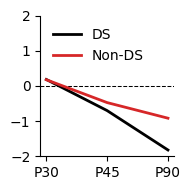

In [55]:
fig,ax=plt.subplots(1,1,figsize=(2,2))
ax.errorbar(np.arange(0,3,1),[log_perc_ds_p30,log_perc_ds_p45,log_perc_ds_p90],color='k',lw=2,label='DS')
ax.errorbar(np.arange(0,3,1),[log_perc_non_ds_p30,log_perc_non_ds_p45,log_perc_non_ds_p90],color='tab:red',lw=2,label='Non-DS')
ax.set_ylim(-2,2)
ax.legend(frameon=False,loc=2)
xticks = [0,1,2]  # Set your x-ticks positions here
xtick_labels = ['P30', 'P45', 'P90']  # Set your custom labels here

ax.set_xticks(ticks=xticks, labels=xtick_labels,fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust 'labelsize' as needed
ax.axhline(0,ls='--',lw=0.75,color='k')

sns.despine()
fig.tight_layout()

## OS/Non-OS cells

In [56]:
rd10_df_non_ds = rd10_df[rd10_df['bar_os_pvalue']>=0.05]
rd10_df_ds = rd10_df[rd10_df['bar_os_pvalue']<0.05]

In [57]:
perc_ds_wt_p30 = round((rd10_df[(rd10_df['bar_os_pvalue']<0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p30 * 100,2)
perc_ds_wt_p45 = round((rd10_df[(rd10_df['bar_os_pvalue']<0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p45 * 100,2)
perc_ds_wt_p90 = round((rd10_df[(rd10_df['bar_os_pvalue']<0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p90 * 100,2)

perc_ds_rd_p30 = round((rd10_df[(rd10_df['bar_os_pvalue']<0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p30 * 100,2)
perc_ds_rd_p45 = round((rd10_df[(rd10_df['bar_os_pvalue']<0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p45 * 100,2)
perc_ds_rd_p90 = round((rd10_df[(rd10_df['bar_os_pvalue']<0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p90 * 100,2)

In [58]:
perc_non_ds_wt_p30 = round((rd10_df[(rd10_df['bar_os_pvalue']>=0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p30 * 100,2)
perc_non_ds_wt_p45 = round((rd10_df[(rd10_df['bar_os_pvalue']>=0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p45 * 100,2)
perc_non_ds_wt_p90 = round((rd10_df[(rd10_df['bar_os_pvalue']>=0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='Bl6')]['preproc_chirp'].values.shape[0]) / num_cells_wt_p90 * 100,2)

perc_non_ds_rd_p30 = round((rd10_df[(rd10_df['bar_os_pvalue']>=0.05)&(rd10_df['animrem']=='P30')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p30 * 100,2)
perc_non_ds_rd_p45 = round((rd10_df[(rd10_df['bar_os_pvalue']>=0.05)&(rd10_df['animrem']=='P45')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p45 * 100,2)
perc_non_ds_rd_p90 = round((rd10_df[(rd10_df['bar_os_pvalue']>=0.05)&(rd10_df['animrem']=='P90')&(rd10_df['genline']=='rd10')]['preproc_chirp'].values.shape[0]) / num_cells_rd_p90 * 100,2)

In [59]:
log_perc_ds_p30 = np.log2((perc_ds_rd_p30/perc_ds_wt_p30))
log_perc_ds_p45 = np.log2((perc_ds_rd_p45/perc_ds_wt_p45))
log_perc_ds_p90 = np.log2((perc_ds_rd_p90/perc_ds_wt_p90))

log_perc_non_ds_p30 = np.log2((perc_non_ds_rd_p30/perc_non_ds_wt_p30))
log_perc_non_ds_p45 = np.log2((perc_non_ds_rd_p45/perc_non_ds_wt_p45))
log_perc_non_ds_p90 = np.log2((perc_non_ds_rd_p90/perc_non_ds_wt_p90))

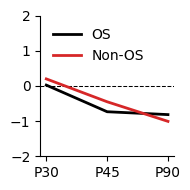

In [60]:
fig,ax=plt.subplots(1,1,figsize=(2,2))
ax.errorbar(np.arange(0,3,1),[log_perc_ds_p30,log_perc_ds_p45,log_perc_ds_p90],color='k',lw=2,label='OS')
ax.errorbar(np.arange(0,3,1),[log_perc_non_ds_p30,log_perc_non_ds_p45,log_perc_non_ds_p90],color='tab:red',lw=2,label='Non-OS')
ax.set_ylim(-2,2)
ax.legend(frameon=False,loc=2)
xticks = [0,1,2]  # Set your x-ticks positions here
xtick_labels = ['P30', 'P45', 'P90']  # Set your custom labels here

ax.set_xticks(ticks=xticks, labels=xtick_labels,fontsize=8)
ax.tick_params(axis='both', which='major', labelsize=10)  # Adjust 'labelsize' as needed
ax.axhline(0,ls='--',lw=0.75,color='k')

sns.despine()
fig.tight_layout()